<P> <B> <font color=red size="6"> Polynomial Regression </Font></B> </P>

Polynomial regression can model non-linear relationships between the features and the target variable by introducing polynomial terms (e.g., x2,x3x2,x3) into a linear regression model. 

<b>When to Use Polynomial Regression?</b>

 <ol>  <b>Advantages:</b>
       <li> Models non-linear relationships effectively.</li>
       <li> Easy to implement and interpret for small polynomial degrees.</li>
        <li>Extends linear regression without the need for complex models.</li></ol> 

<ol>  <b>Limitations:</b>
        <li>Prone to overfitting with high-degree polynomials.</li>
       <li> Less efficient and interpretable with very high-dimensional data.</li>
       <li> Sensitive to outliers.</li></ol>  

<b>Adjustments</b>

    Degree of Polynomial: You can experiment with degree (e.g., 3 or 4) to capture more complexity in the relationship.
    Regularization: Use Ridge or Lasso regression with polynomial features to reduce overfitting.
    Feature Selection: Evaluate if all polynomial terms are necessary or if certain terms can be omitted.

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)

In [4]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [6]:
# Standardize the features (important for polynomial terms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>Polynomial Features:</b>

    The PolynomialFeatures class generates polynomial terms up to a specified degree (e.g., x,x2,x3x,x2,x3).
    degree=2 includes linear and quadratic terms.

In [7]:
# Transform features to include polynomial terms
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

<b><li>Feature Standardization:</b>
    Standardizing features ensures that polynomial terms (especially higher degrees) don’t dominate due to their magnitude.</li>
<b><li>Linear Regression:</b>
    After generating polynomial features, a simple linear regression model is used to fit the data.</li>

In [8]:
# Fit a linear regression model to the polynomial-transformed data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_poly, y_train)


LinearRegression()

In [9]:
# Make predictions
y_pred_train = linear_regressor.predict(X_train_poly)
y_pred_test = linear_regressor.predict(X_test_poly)

In [10]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [11]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")

Training Mean Squared Error: 0.0065
Testing Mean Squared Error: 0.0857
Training R^2 Score: 0.9884
Testing R^2 Score: 0.8420


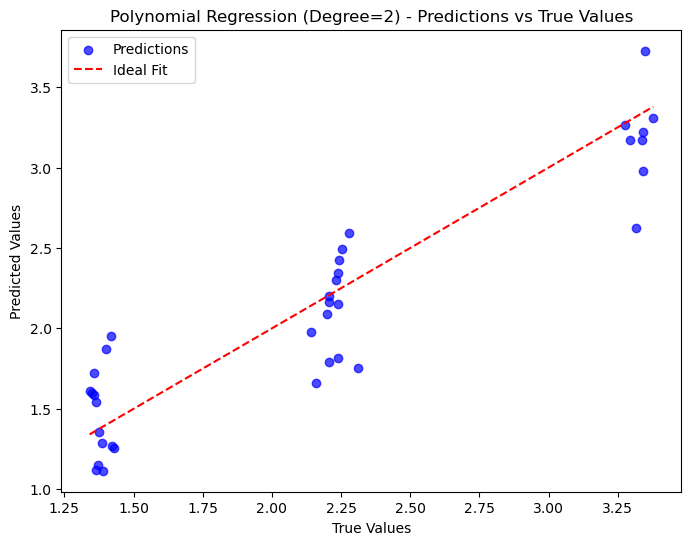

In [12]:
# Visualize predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Polynomial Regression (Degree={degree}) - Predictions vs True Values')
plt.legend()
plt.show()

In [ ]:
w